In [26]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Import data
df = pd.read_csv("IMDB Dataset.csv")

# Clean the data
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Clean HTML tags
    text = text.lower()  # convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    return text

df['clean_review'] = df['review'].apply(clean_text)

# Label encode
df['sentiment'] = df['sentiment'].map({'positive':1, 'negative':0})

# Split
X_train, X_test, y_train, y_test = train_test_split(df['clean_review'], df['sentiment'], test_size=0.2, random_state=42)

# Vectorize
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Forecast and report
y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4961
           1       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [27]:
#DISPLAY SAMPLE COMMENTS WITH MODELE STIMATION
import random

#Choose 5 random comments from sample comments and guess them
sample_indexes = random.sample(range(len(X_test)), 5)
for idx in sample_indexes:
    print(f"Comment: {X_test.iloc[idx]}")
    print(f"Prediction: {'Pozitive' if y_pred[idx] == 1 else 'Negative'}")
    print(f"Reality: {'Pozitive' if y_test.iloc[idx] == 1 else 'Negative'}\n")

Comment: return to frogtown was a hard film to track down well i accomplished that mission and it had been sitting on the shelf for a good while wish it was kept that way first sam hell is of course not roddy piper he is replaced by a dude with a large face less charisma and this poor actor is very softspoken for the part sam hell is supposed to be rebellious and awesome here he gets captured three times what kind of a hero is that spangle is replaced as well here by another actress why did we not get different characters here this was stupid lou ferrigno stars in this film and he is not even the hero common sense says let lou be the hero of the film bad effects poor acting and just a forgettable film funny as they take shots at ninja turtles 2 with the whole concert scene in this movie at least ninja turtles 2 was funny and not a bad movie i really wanted to like return to frogtown but i just cringed when the fight scenes would commence this film makes turtles 3 look like gold avoid t

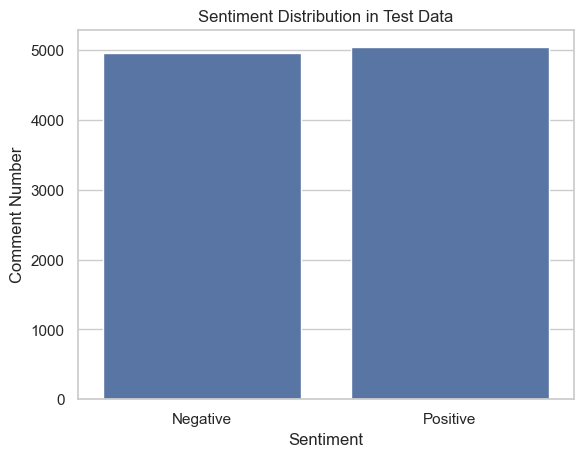

In [28]:
sns.countplot(x=y_test)
plt.title("Sentiment Distribution in Test Data")
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.ylabel("Comment Number")
plt.xlabel("Sentiment")
plt.show()

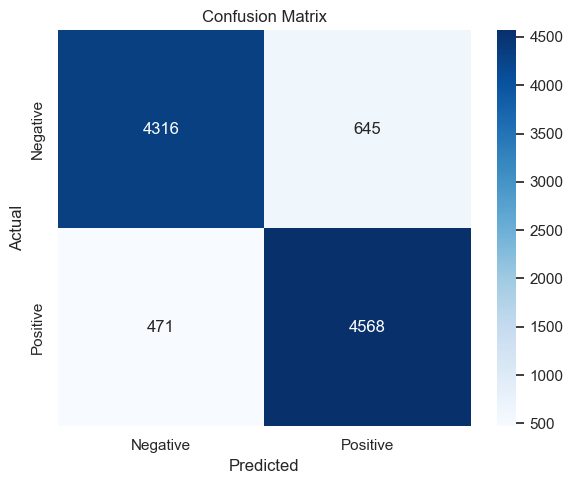

C:\Users\gizem\AppData\Local\Temp\ipykernel_6704\3299798152.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette='Set2')


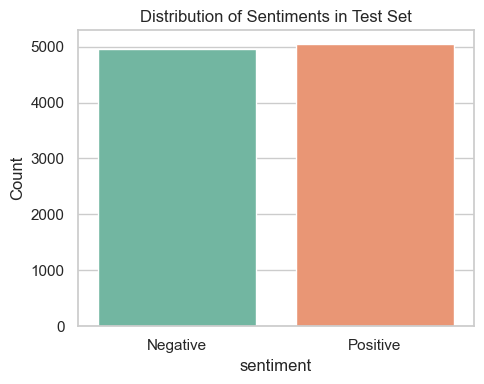

In [29]:
#Confusion Matrix and Scatter Plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Class Distribution
plt.figure(figsize=(5, 4))
sns.countplot(x=y_test, palette='Set2')
plt.title("Distribution of Sentiments in Test Set")
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [30]:
#Show Incorrectly Predicted Comments
# Print sample comments with incorrect predictions
wrong_predictions = (y_test != y_pred)

# Get index of comments
wrong_indexes = X_test[wrong_predictions].index

# Select 5 random incorrect examples
import random
sample_wrong_indexes = random.sample(list(wrong_indexes), 5)

for idx in sample_wrong_indexes:
    comment = X_test.loc[idx]
    prediction = 'Positive' if y_pred[list(X_test.index).index(idx)] == 1 else 'Negative'
    actual = 'Positive' if y_test.loc[idx] == 1 else 'Negative'
    
    print(f"\n🔹 Comment: {comment[:300]}...")  # shorten the long comments
    print(f"   ➤ Prediction: {prediction}")
    print(f"   ➤ Reality: {actual}")


🔹 Comment: this movie is all about blaxploitation there is absolutely no plot at all a pimp stops some bad guys with his kung fu hoes to try to get his nightclub back rated r for strong language and a brief sexual situation...
   ➤ Prediction: Negative
   ➤ Reality: Positive

🔹 Comment: unless im sadly mistaken i rented a nightmare on elm street 3 several years ago and there was a music video im pretty sure which was called dream warriors at the end of it and i rented this one on dvd hoping that the video would be there because it was one of the funniest things ive ever seen its am...
   ➤ Prediction: Positive
   ➤ Reality: Negative

🔹 Comment: enchanted april was one of harry beaumonts last movies he only directed a few more after this one he had made the maisie movies in the 1930s and 1940s in the opening credits it says from the novel by elizabeth and completely leaves off the authors last name rather odd but since it was von armin they...
   ➤ Prediction: Positive
   ➤ Reality: Ne

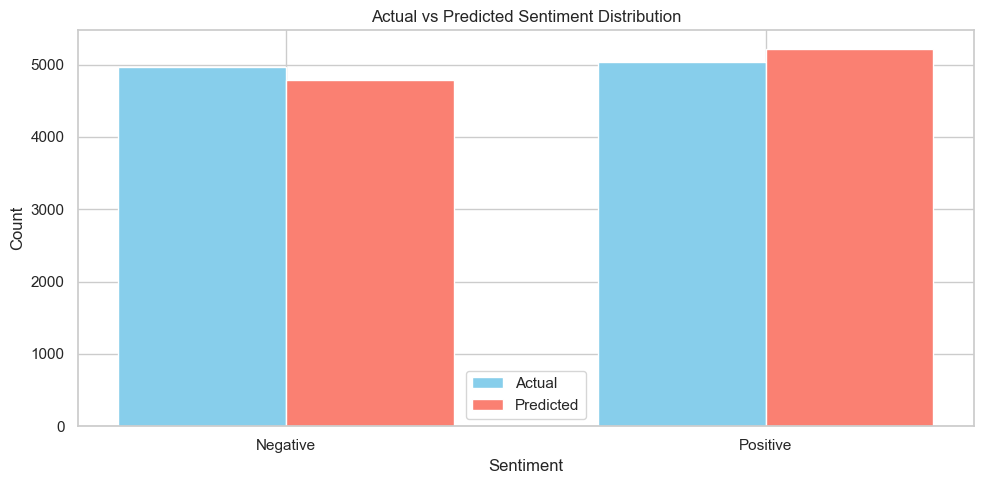

In [31]:
# Positive vs Negative Comment Distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Get the numbers
label_counts = y_test.value_counts().sort_index()
pred_counts = pd.Series(y_pred).value_counts().sort_index()

labels = ['Negative', 'Positive']

plt.figure(figsize=(10, 5))
bar_width = 0.35
x = range(len(labels))

# Real tags
plt.bar(x, label_counts, width=bar_width, label='Actual', color='skyblue')

# Prediction tags
plt.bar([p + bar_width for p in x], pred_counts, width=bar_width, label='Predicted', color='salmon')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Actual vs Predicted Sentiment Distribution')
plt.xticks([p + bar_width / 2 for p in x], labels)
plt.legend()
plt.tight_layout()
plt.show()


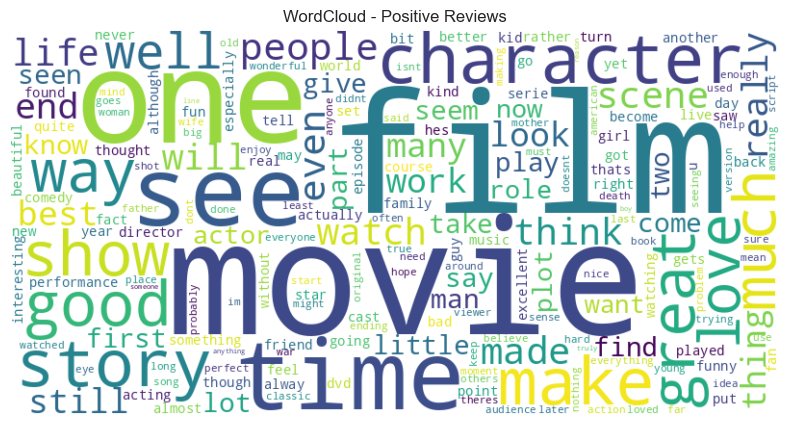

In [32]:
#Most used words (Wordcloud)
from wordcloud import WordCloud

# Make WordCloud from positive and negative comments
positive_text = " ".join(X_train[y_train == 1])
negative_text = " ".join(X_train[y_train == 0])

# Pozitive comments
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Positive Reviews")
plt.show()

In [33]:
import joblib
joblib.dump(model, 'imdbsentiment_model.pkl')

['imdbsentiment_model.pkl']